#  Ev. 1:- Baseball Case Study 

In [24]:
#Libraries to be used for model building
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Loading the csv file.
data=pd.read_csv("baseball.csv")

In [26]:
# .head used for fetching first five rows 
data.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# EDA (EXPLORATORY DATA ANALYSIS PHASE)

In [19]:
# For checking how many rows and columns are there in dataset
data.shape

(30, 17)

In this, the observation is that there are 30 rows and 17 columns in the dataset.

In [42]:
# For checking the number of unique values 
data.nunique()

W      24
R      28
AB     29
H      29
2B     22
3B     23
HR     27
BB     29
SO     29
SB     27
RA     30
ER     30
ERA    30
CG      9
SHO    12
SV     20
E      21
dtype: int64

In [43]:
# For checking the Null/NAN values in the dataset
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In this, there are no Null/NaN values in the dataset

In [44]:
# For checking the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [45]:
# For seeing the available columns in the dataset
data.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [46]:
# For checking the datatypes of each columns.
data.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

**In this, the datatypes of all columns are int64 and only ERA column has Float dtype

In [47]:
# For checking the statistical summary of the dataset for working ahead.
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In this, there is a difference between Third quantile i.e Q3 and max, so there will be some outliers also in the dataset.

W          AxesSubplot(0.125,0.71587;0.0596154x0.16413)
R       AxesSubplot(0.196538,0.71587;0.0596154x0.16413)
AB      AxesSubplot(0.268077,0.71587;0.0596154x0.16413)
H       AxesSubplot(0.339615,0.71587;0.0596154x0.16413)
2B      AxesSubplot(0.411154,0.71587;0.0596154x0.16413)
3B      AxesSubplot(0.482692,0.71587;0.0596154x0.16413)
HR      AxesSubplot(0.554231,0.71587;0.0596154x0.16413)
BB      AxesSubplot(0.625769,0.71587;0.0596154x0.16413)
SO      AxesSubplot(0.697308,0.71587;0.0596154x0.16413)
SB      AxesSubplot(0.768846,0.71587;0.0596154x0.16413)
RA      AxesSubplot(0.840385,0.71587;0.0596154x0.16413)
ER        AxesSubplot(0.125,0.518913;0.0596154x0.16413)
ERA    AxesSubplot(0.196538,0.518913;0.0596154x0.16413)
CG     AxesSubplot(0.268077,0.518913;0.0596154x0.16413)
SHO    AxesSubplot(0.339615,0.518913;0.0596154x0.16413)
SV     AxesSubplot(0.411154,0.518913;0.0596154x0.16413)
E      AxesSubplot(0.482692,0.518913;0.0596154x0.16413)
dtype: object

<Figure size 6840x10800 with 0 Axes>

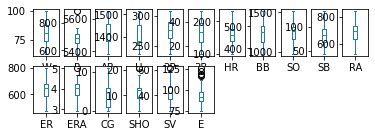

In [49]:
# As in df.describe() method there will be some outliers present, so for inspecting boxplot is used
plt.figure(figsize=(95,150))
data.plot(kind="box", subplots=True, layout=(4,11))

Here, the observation is that the outliers are present in ERA, R,SHO,SV AND E.

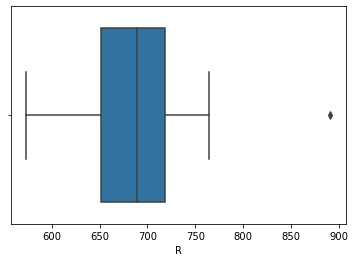

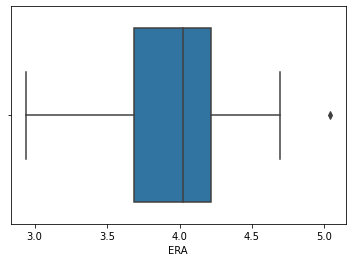

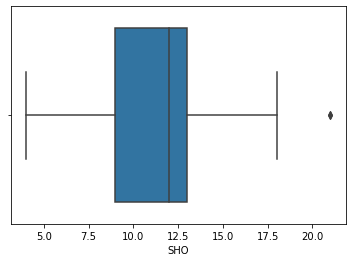

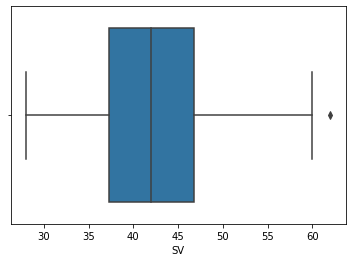

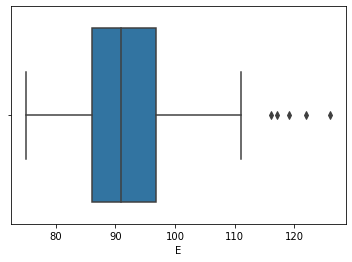

In [50]:
# For seeing this outliers physically on boxplot
out=["R","ERA","SHO","SV","E"]
for i in out:
    sns.boxplot(data[i])
    plt.show()

Outliers are displayed in above boxplots.

In [51]:
#For checking the skewness of the data whether or not skewness is present
data.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

Result of skewness displayed above

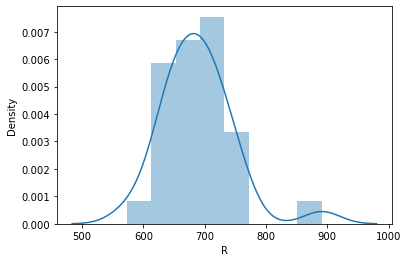

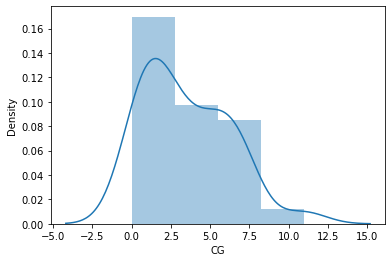

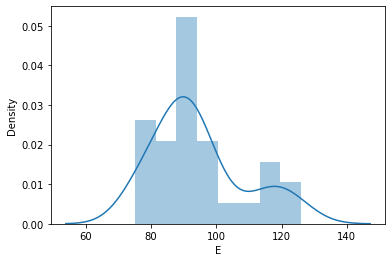

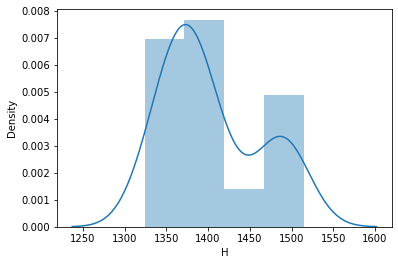

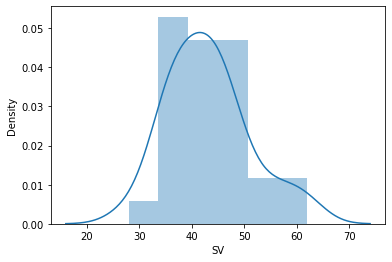

In [53]:
# For seeing the skewness using distplot
skewness=['R', 'CG', 'E','H','SV']
for i in skewness:
    sns.distplot(data[i])
    plt.show()

Now i am proceeding towards the removal of outliers.

In [56]:
# Applying Zscore to remove outliers

from scipy.stats import zscore
zsc=np.abs(zscore(data))

In [57]:
zsc

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,1.365409,0.619078,0.847731,1.663685,1.420173,1.041193,0.787299,1.534902,2.697630,0.913883,0.666234,0.505110,0.506955,0.539806,0.814629,1.671607,0.461470
1,0.197838,0.134432,0.711094,0.970681,0.127403,1.235809,0.243967,0.536592,0.154878,0.601826,0.165971,0.248930,0.254598,0.539806,0.172800,0.249879,0.607197
2,0.003243,0.332906,1.115233,0.151891,1.588795,0.223808,0.723377,1.139144,0.893982,0.111449,0.680339,0.751623,0.641347,2.772641,0.320914,0.654856,1.117242
3,0.483244,1.146419,0.241522,0.401088,0.828122,0.418423,0.883181,1.160536,0.168602,0.690985,0.180076,0.103922,0.053010,1.300442,0.567771,0.784104,0.485758
4,0.677839,0.013270,1.280738,1.984081,0.801892,1.722347,0.403770,0.251360,0.105866,0.022290,1.618803,1.597501,1.531318,1.300442,0.172800,1.042600,0.607197
5,1.170814,3.509647,0.104884,1.361089,1.869832,1.391501,2.185047,1.798742,0.952796,0.200609,0.257184,0.389104,0.350165,1.300442,0.320914,1.171848,0.461470
6,0.587028,1.311430,0.732263,0.116292,0.153633,1.196885,1.545833,1.513510,0.207812,0.913883,0.137760,0.234429,0.165003,0.171757,1.802057,0.637623,0.097152
7,0.003243,0.428681,0.451289,0.596886,1.615025,1.099578,1.705636,0.910958,0.811641,1.760897,0.067235,0.147424,0.209800,1.275906,0.320914,0.008617,1.262970
8,0.094054,0.765626,0.451289,0.365489,0.183611,0.068115,0.107601,0.590073,0.605790,0.156029,0.652129,0.461608,0.484557,0.907856,0.172800,2.188598,0.048576
9,0.288649,1.034489,1.785913,1.628086,1.082929,0.165423,0.084163,0.158660,0.982204,0.557246,0.913544,0.843461,0.792164,0.171757,0.320914,0.396360,0.194303


In [58]:
# For applying threshold as per criteria of Zscore.
threshold=3
print(np.where(zsc>3))

(array([5], dtype=int64), array([1], dtype=int64))


Here the threshold  taken is 3 because of optimal limit in Zscore

In [64]:
data1=data[(zsc<3).all(axis=1)]
data1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [66]:
# Used for checking outlier removed or not
data1.shape

(29, 17)

The outliers are removed from dataset as shown above

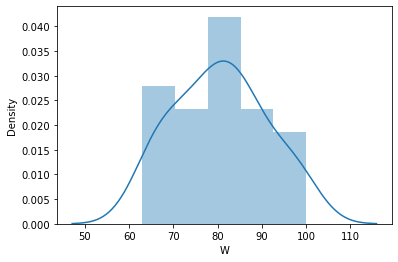

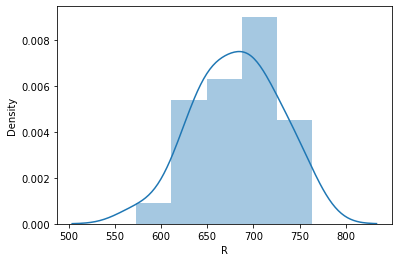

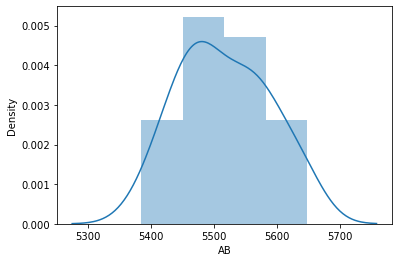

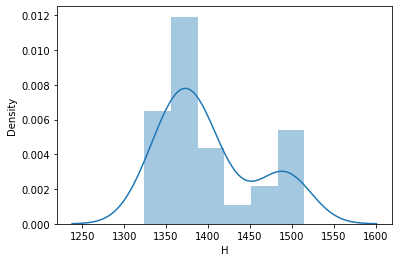

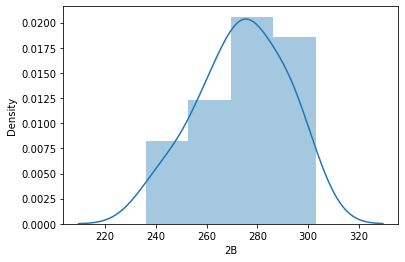

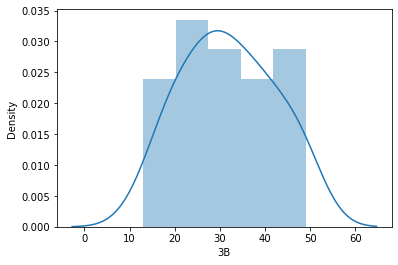

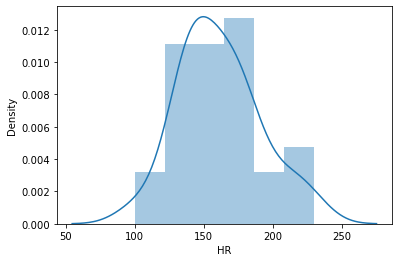

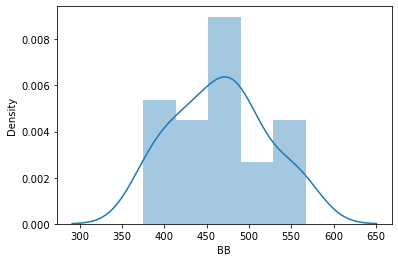

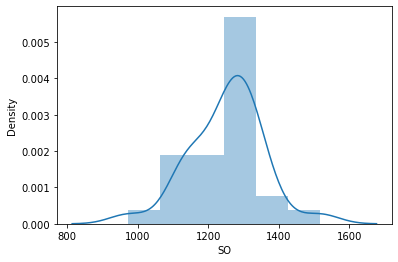

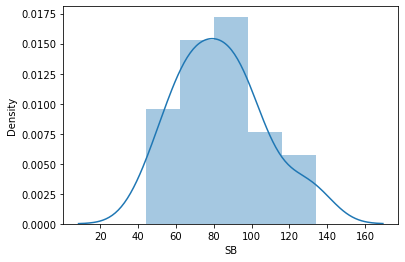

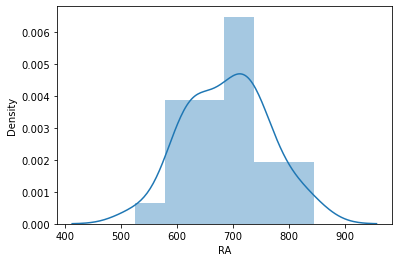

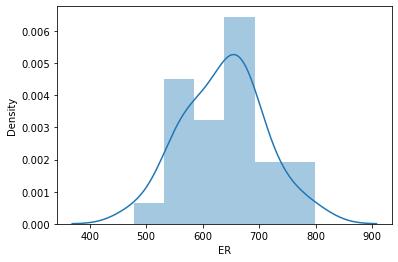

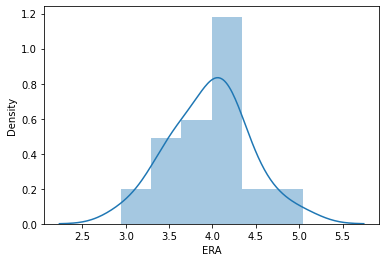

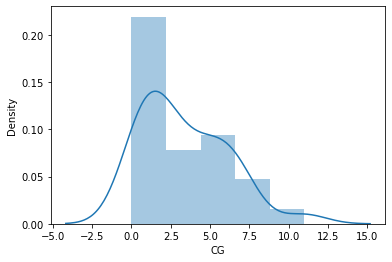

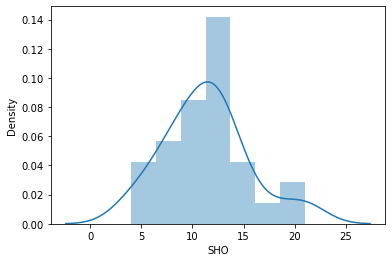

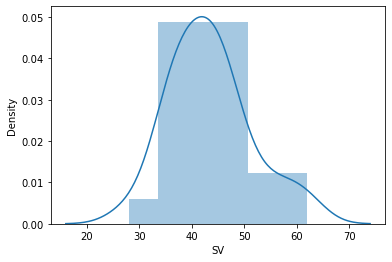

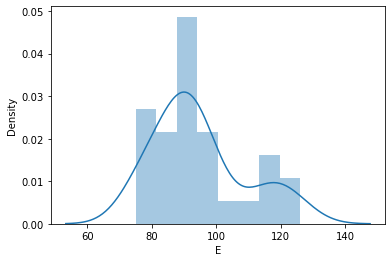

In [67]:
# Now i am checking again that whether there is a change in skewness levels or not after removal of outliers
for i in data1.columns:
    plt.figure()
    sns.distplot(data1[i])
    plt.show()

Here, i observed that the skewness has came to normal and for more better skewness the model prediction percentage will get suffered

In [70]:
# Command for checking correlation.
corr=data1.corr()

In [71]:
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
R,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
AB,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
H,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
2B,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
3B,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
HR,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
BB,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
SO,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
SB,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


<AxesSubplot:>

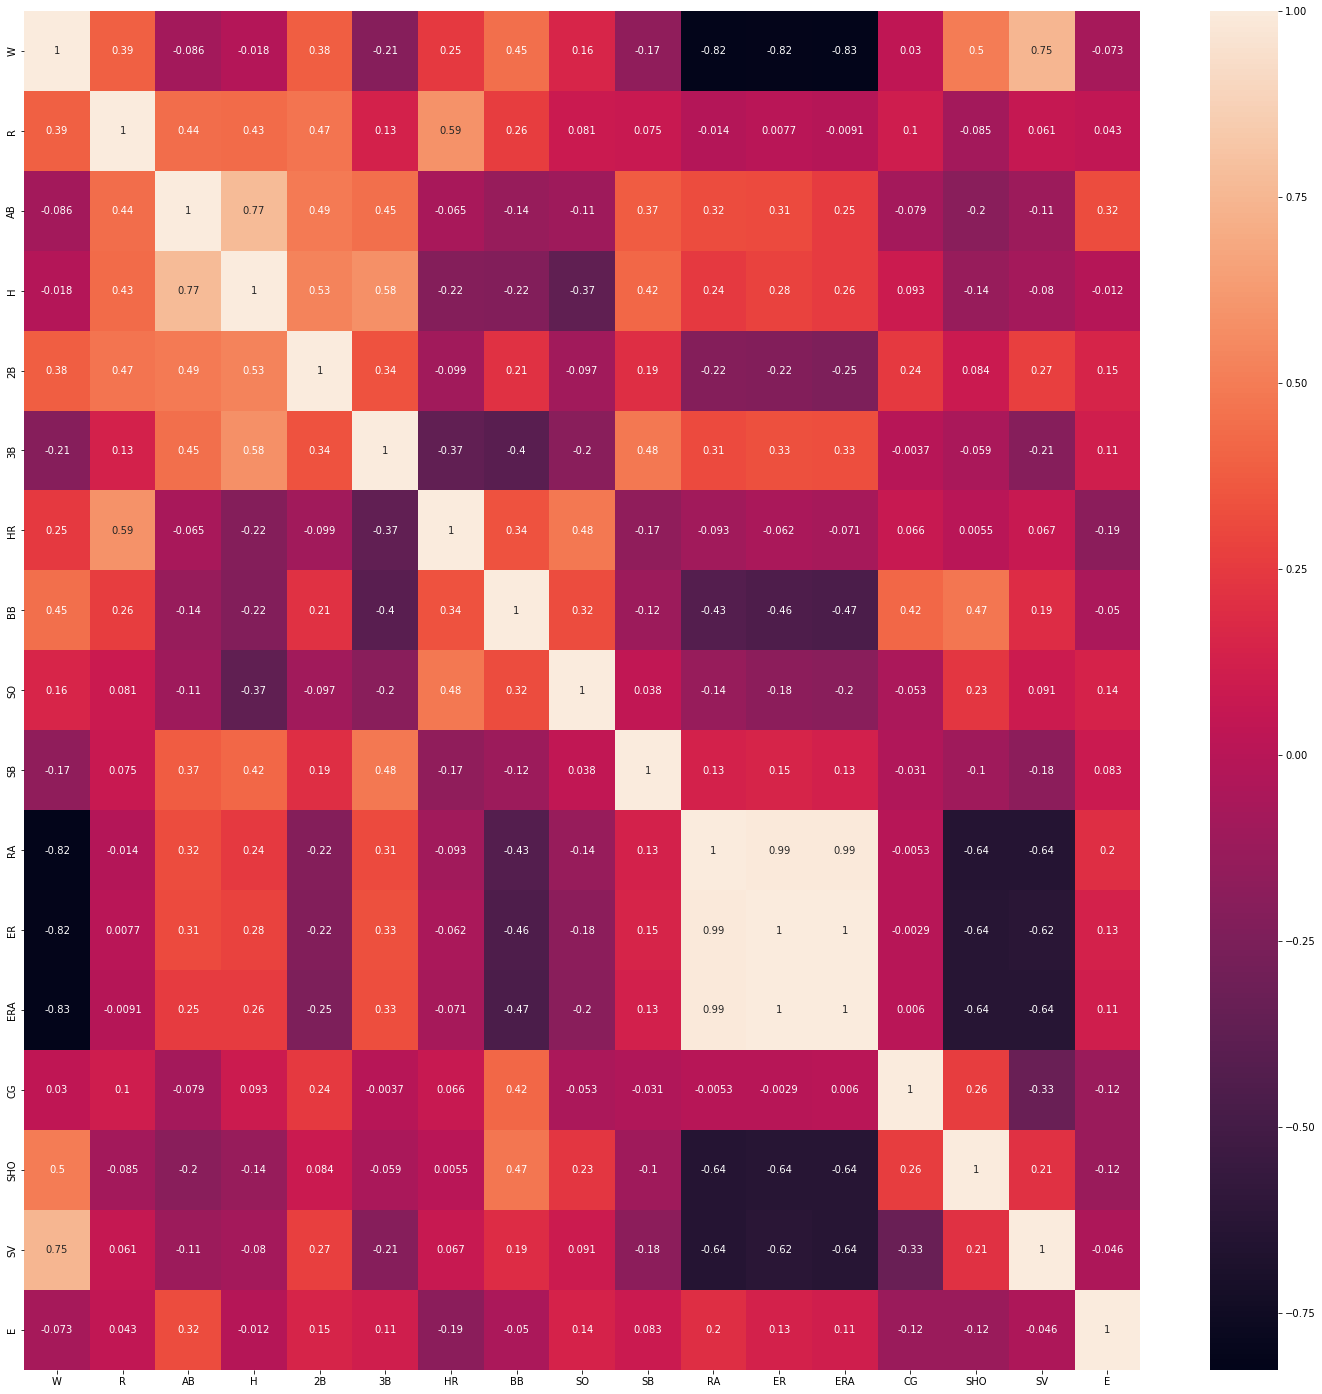

In [72]:
# For checking the correlation using the heatmap also
plt.figure(figsize=(25,25))
sns.heatmap(data1.corr(), annot=True)

The observation is that there are 3 columns i.e. RA, ER & ERA which are very highly negatively correlated to the target column, So we should remove these columns in order to get good predictions of the model

In [73]:
# Now i am removing the above shown highly negative correlated columns
data1.drop(["RA", "ER","ERA"], axis=1, inplace=True)

In [74]:
# For checking whether the columns has been removed 
data1

,W,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,5,9,45,119


As shown above the negative correlated columns has been removed from dataset

In [76]:
# For confirming that the columns has been removed or not but it is removed as shown below
data1.shape

(29, 14)

# Performing Univariate Analysis now

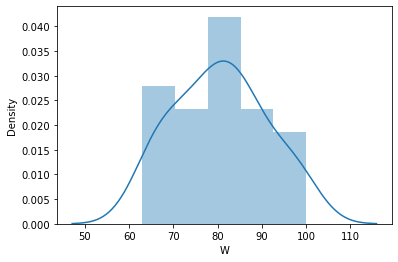

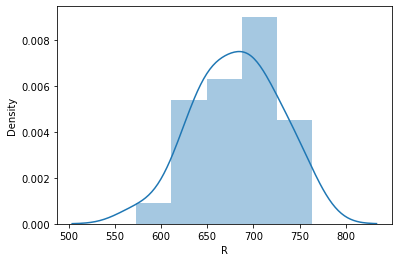

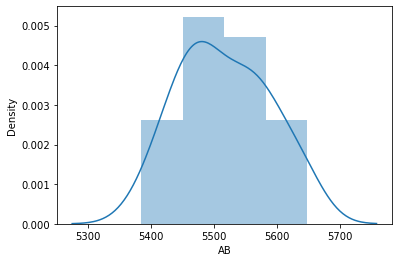

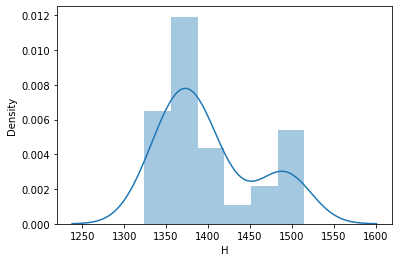

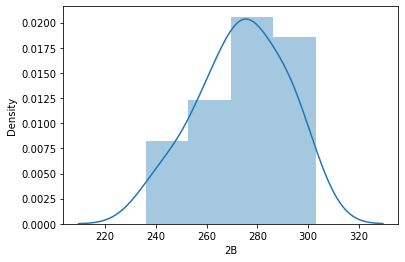

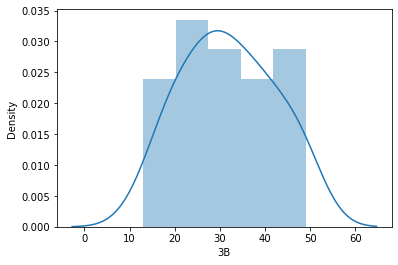

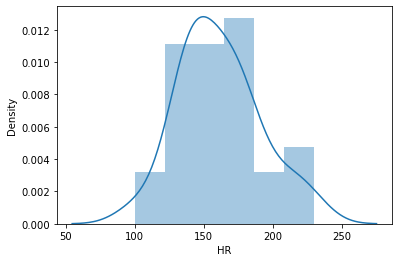

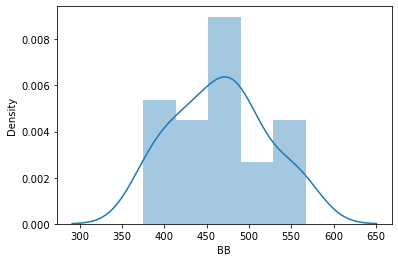

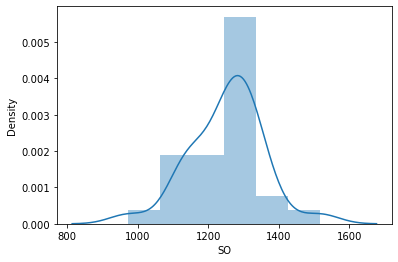

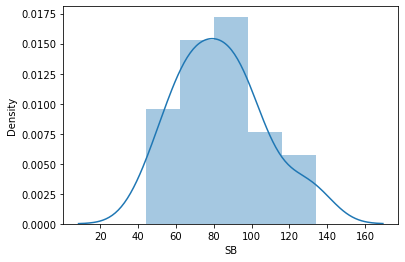

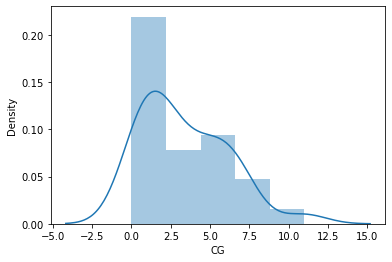

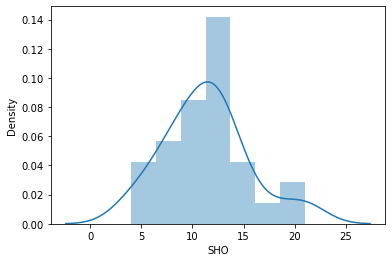

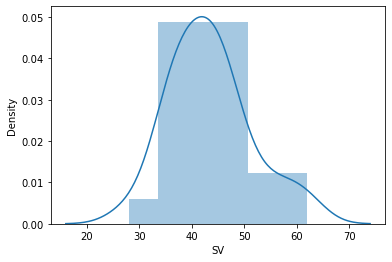

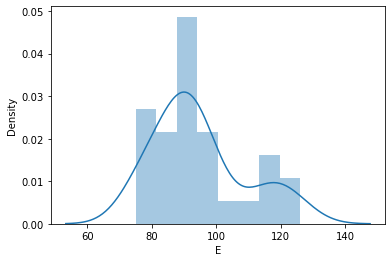

In [77]:
for i in data1.columns:
    sns.distplot(data1[i])
    plt.show()

# Bivariate Analysis 

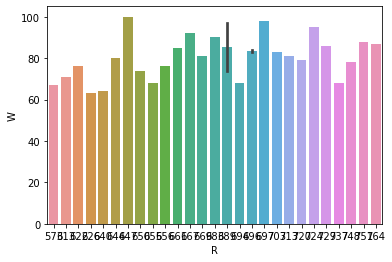

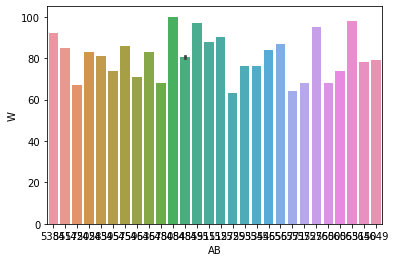

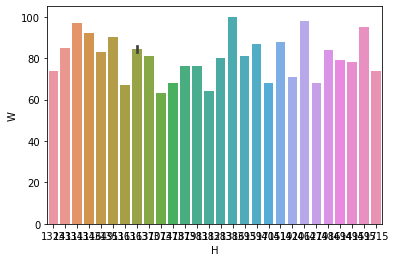

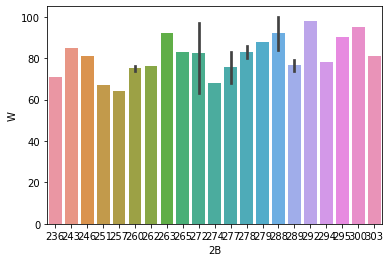

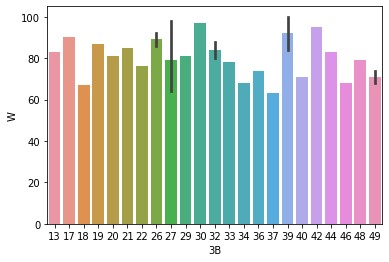

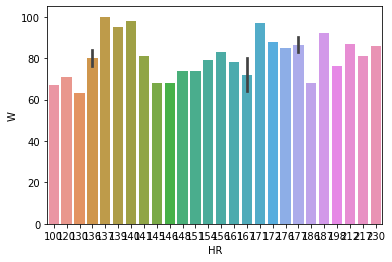

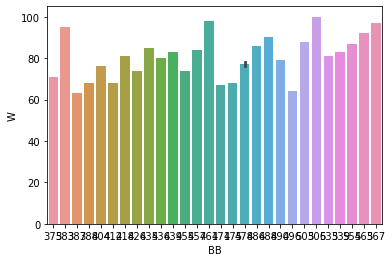

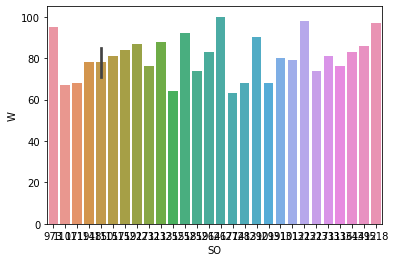

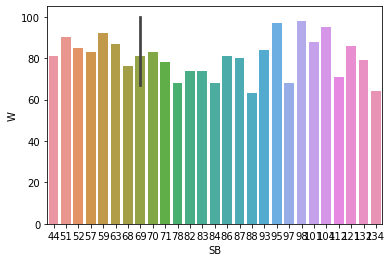

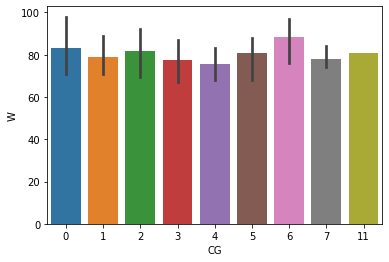

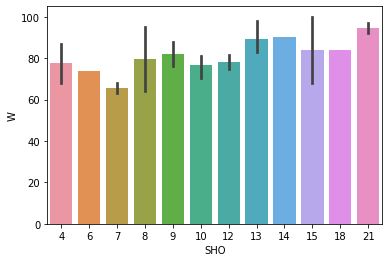

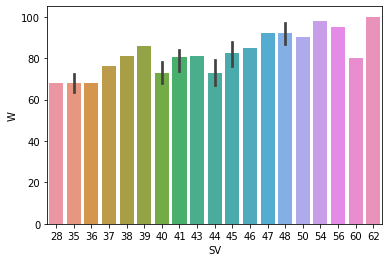

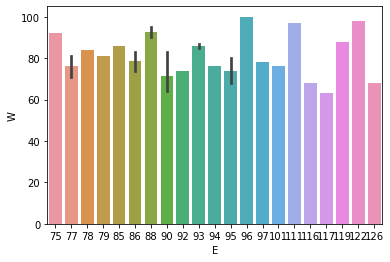

In [79]:
# Bivariate analysis using barplots
index=0
features=data1.drop("W",axis=1)
for col,value in features.items():
    sns.barplot(x=col, y="W", data=data1)
    index+=1
    plt.show()

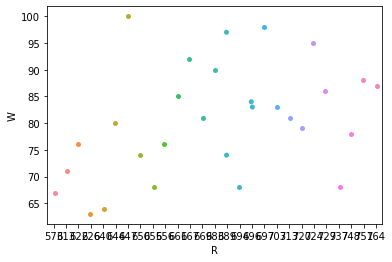

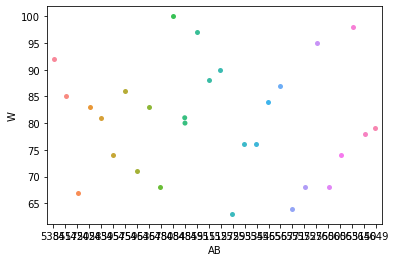

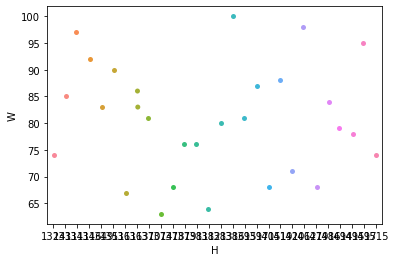

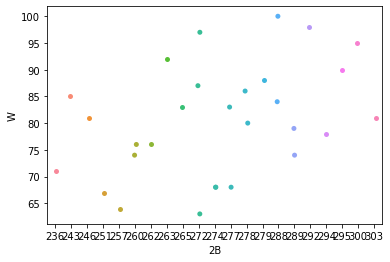

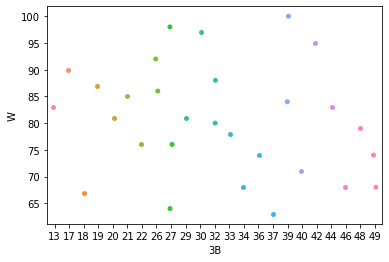

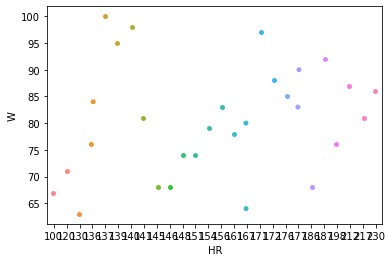

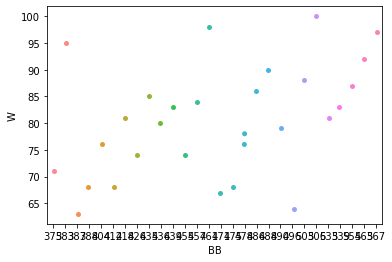

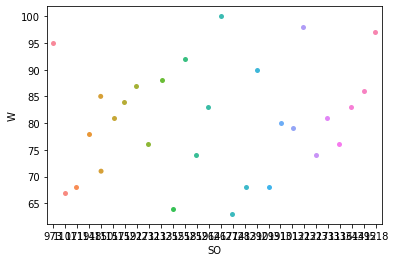

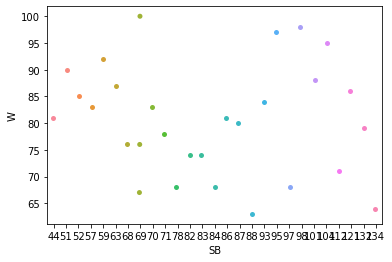

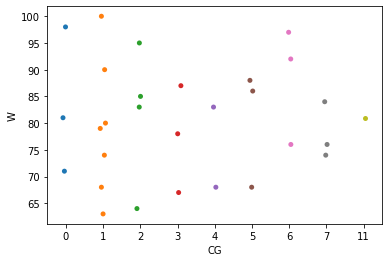

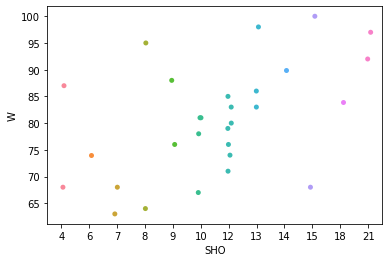

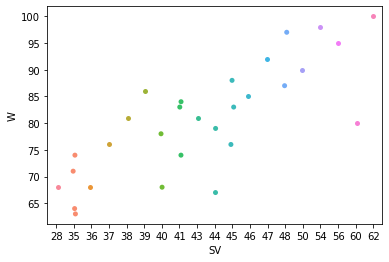

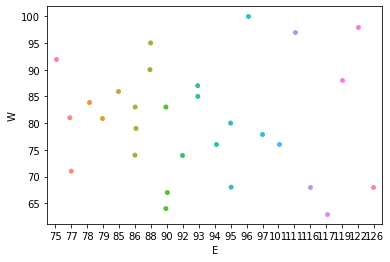

In [80]:
# Checking through another plotting method
index=0
features=data1.drop("W",axis=1)
for col,value in features.items():
    sns.stripplot(x=col, y="W", data=data1)
    index+=1
    plt.show()

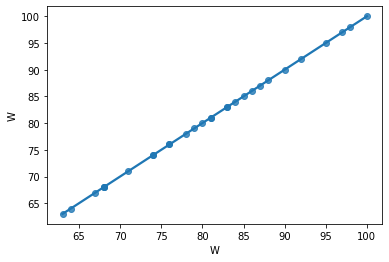

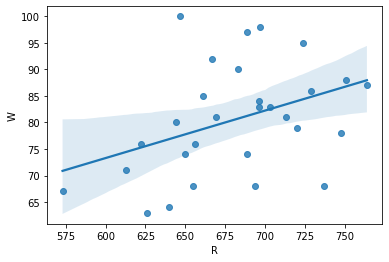

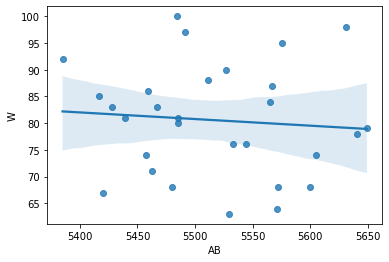

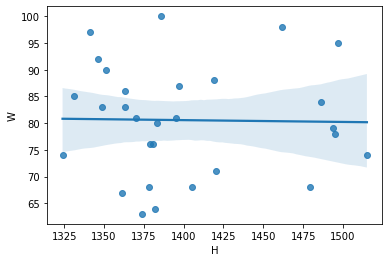

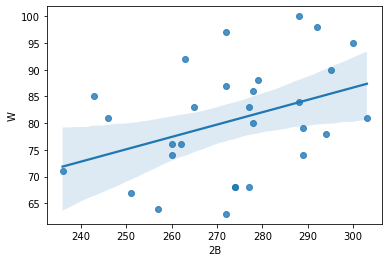

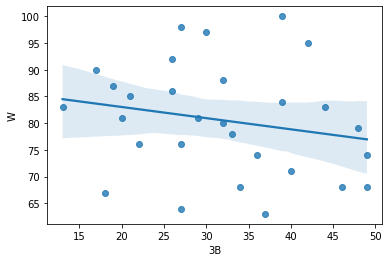

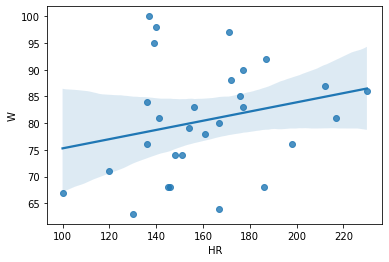

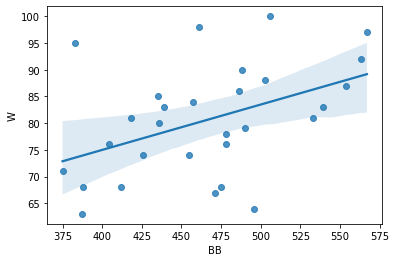

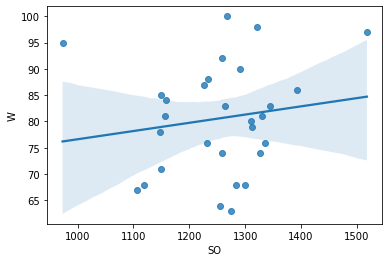

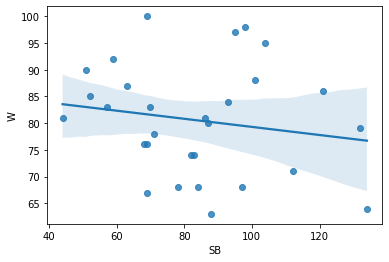

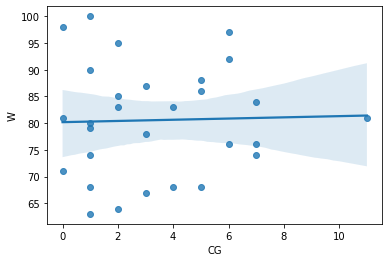

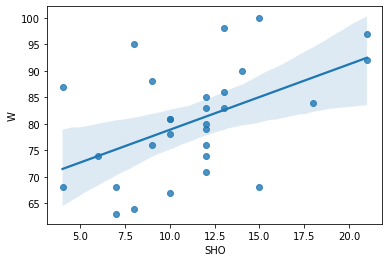

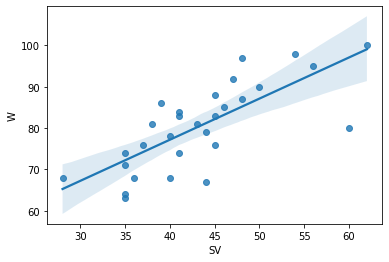

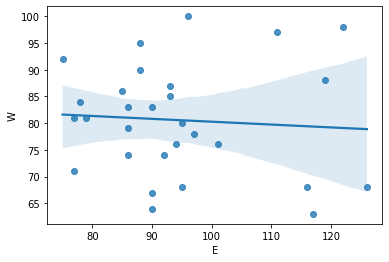

In [81]:
# Checking through another plotting method
for i in data1:
    sns.regplot(x=i, y="W", data=data1)
    plt.show()

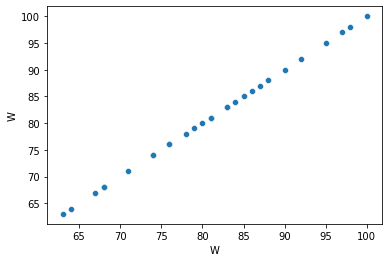

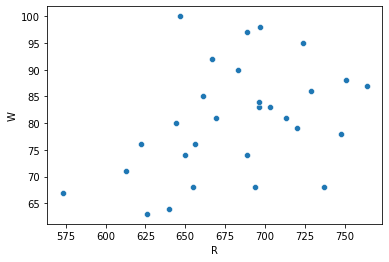

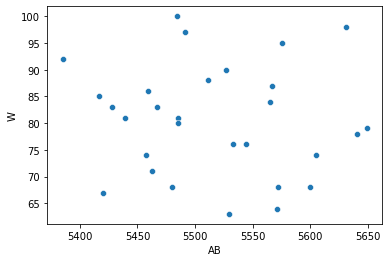

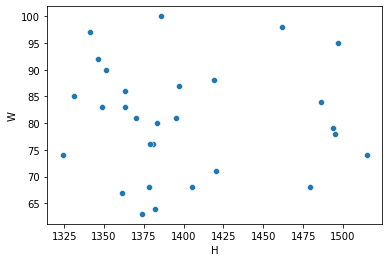

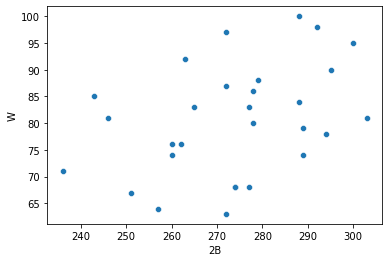

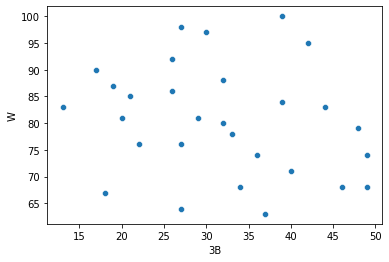

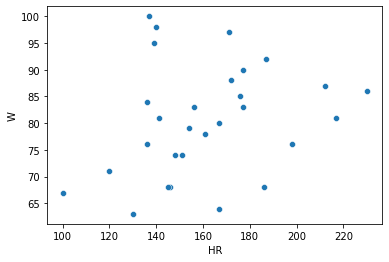

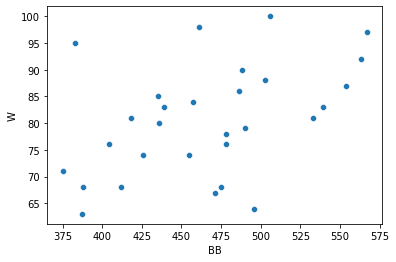

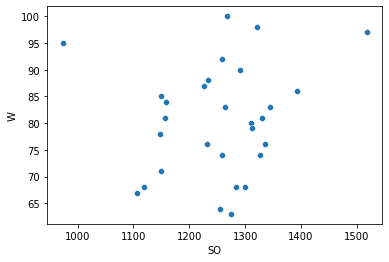

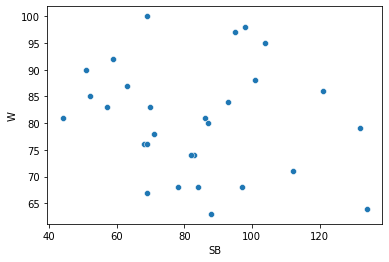

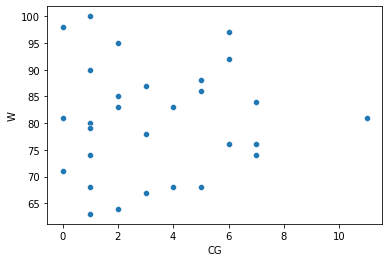

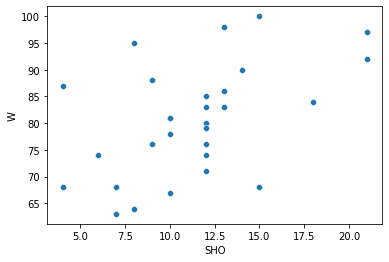

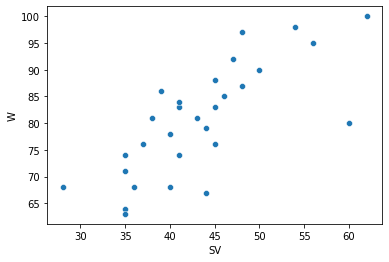

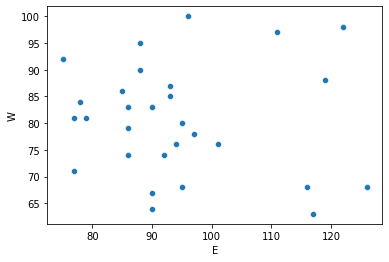

In [82]:
# Checking through another different plotting method
for i in data1:
    sns.scatterplot(x=i, y="W", data=data1)
    plt.show()

The observation is that the columns R, 2B, HR, BB, SO, SHO, & SV are very much correlated with the W column i.e the target column

# Using Multivariate Analysis 

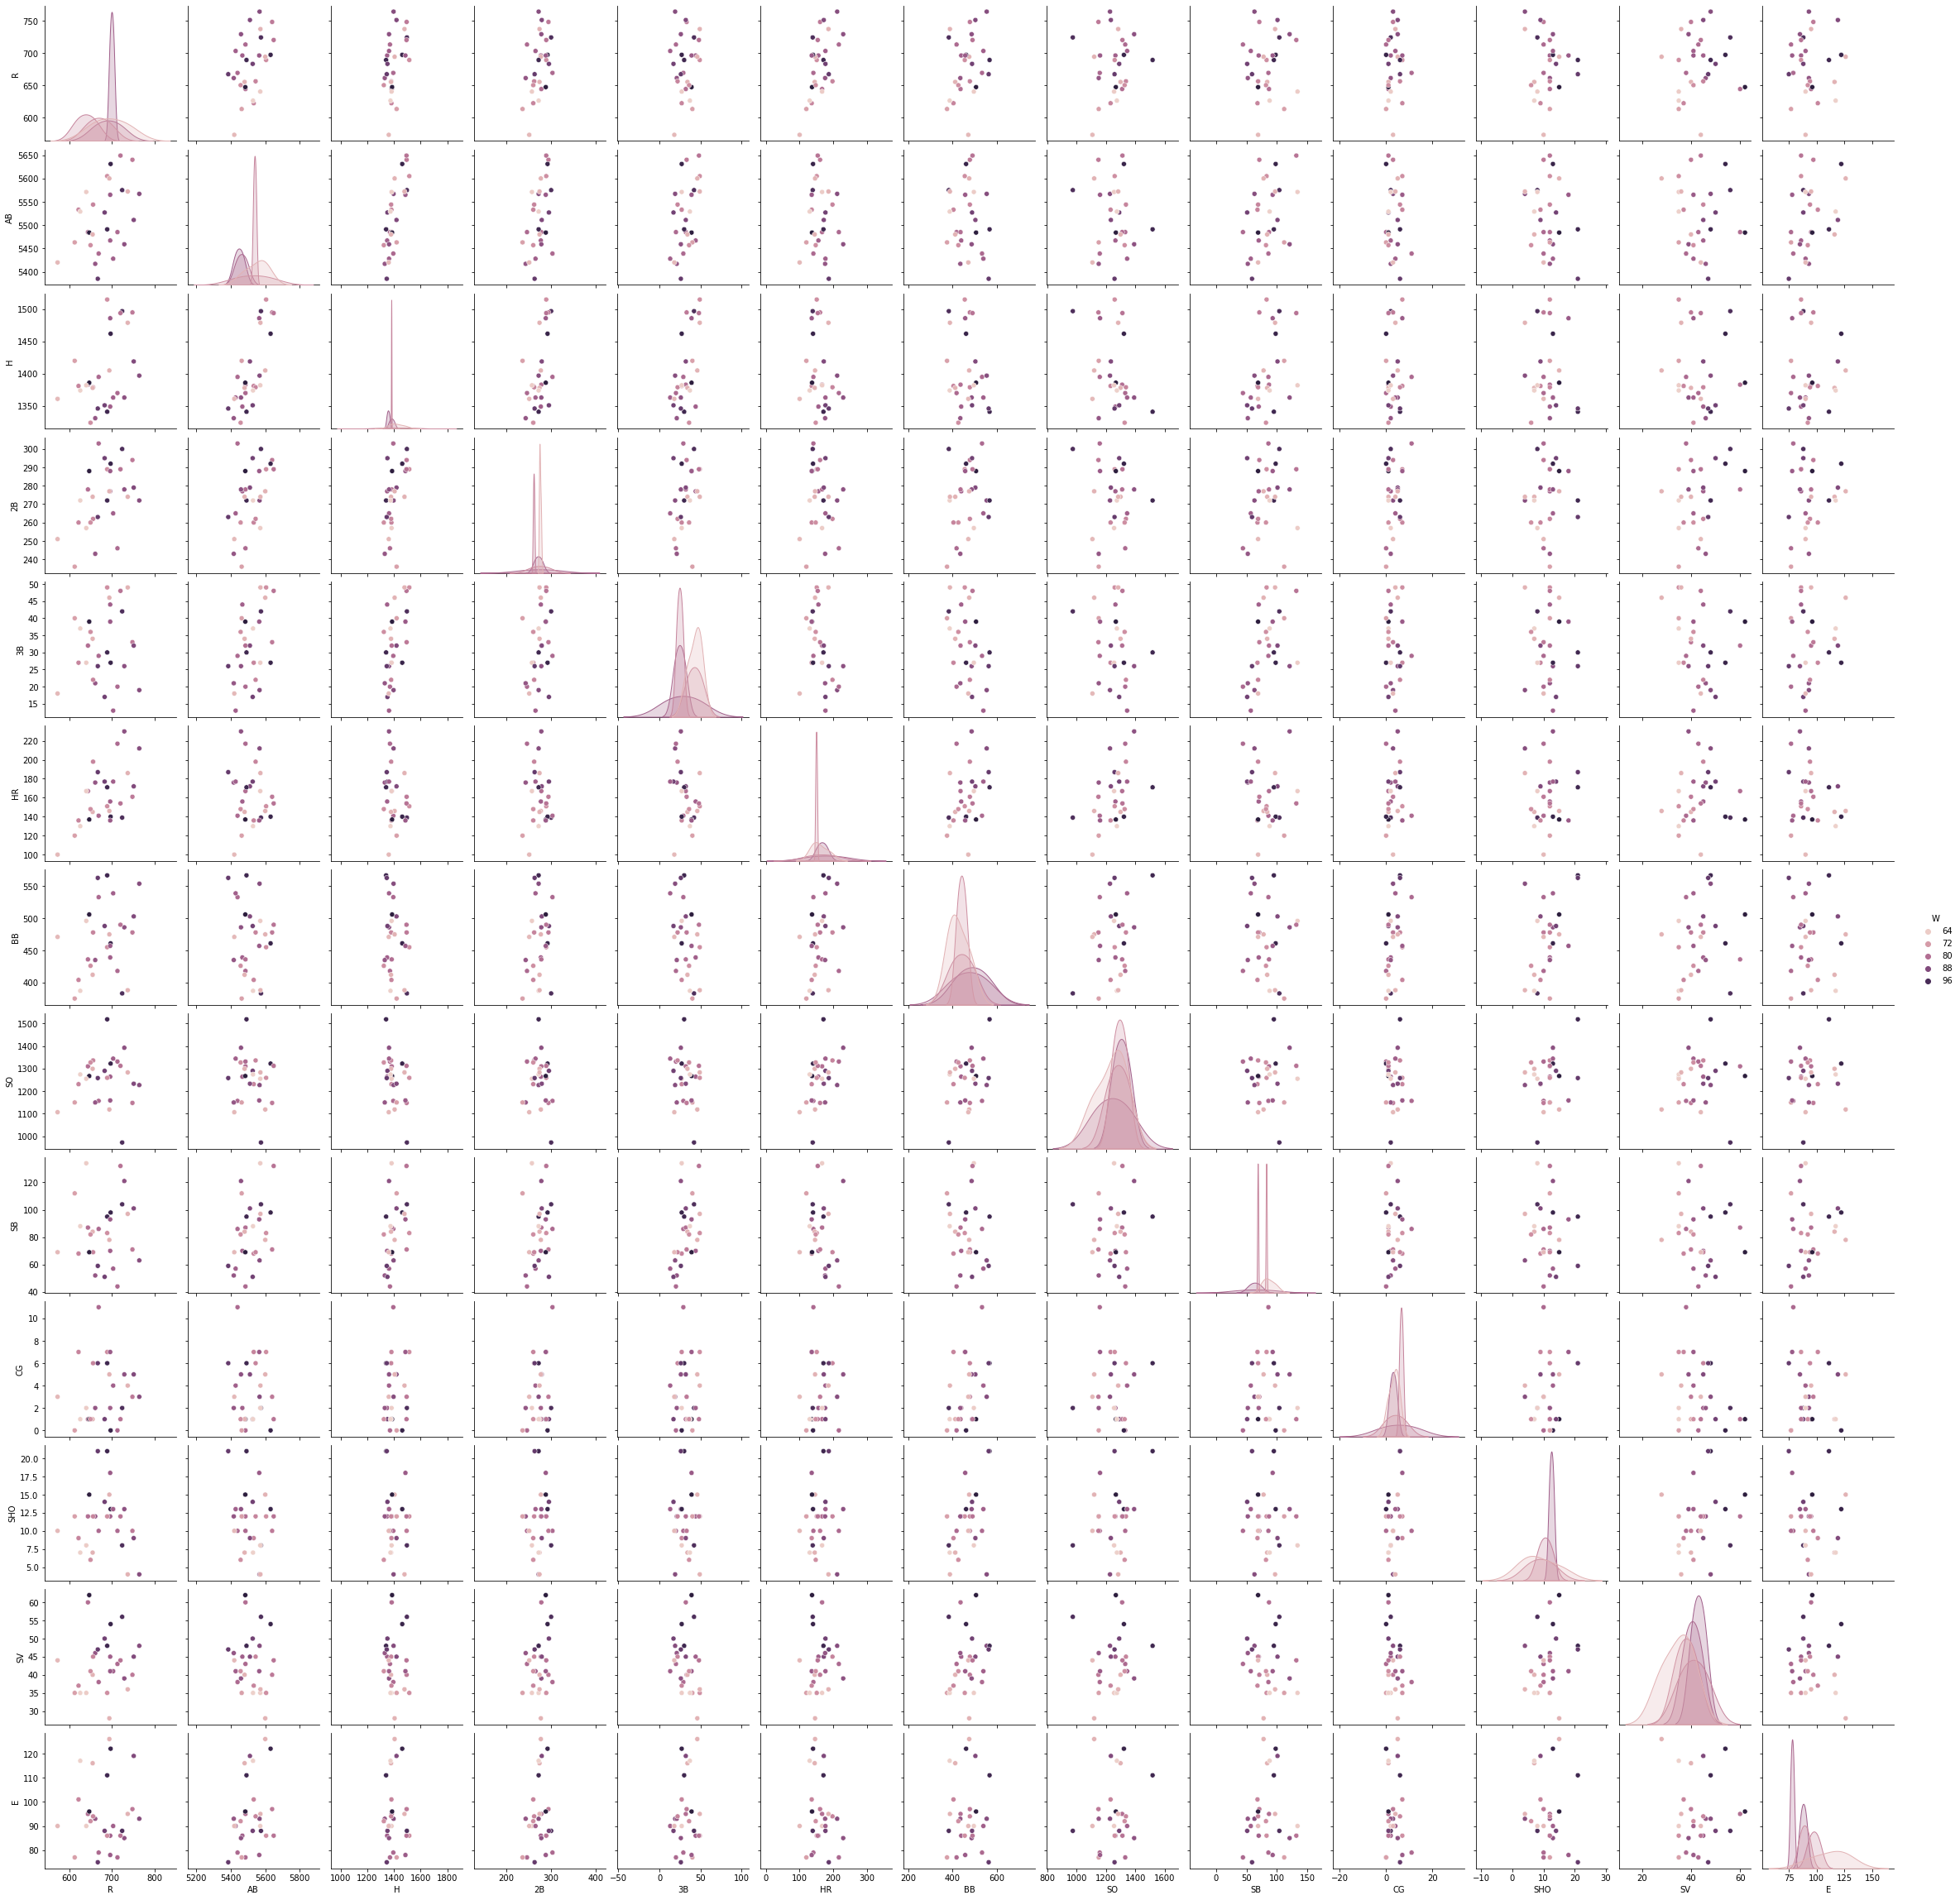

In [83]:
# For checking using another method:- Pairplot 
sns.pairplot(data1, hue="W")

In [84]:
features

,R,AB,H,2B,3B,HR,BB,SO,SB,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,5,9,45,119


# Data Standardization

In [86]:
# Here alloting variable X to features and y to the target column
x=features
y=data1["W"]

In [87]:
# Importing neccessary libraries for standardization
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
# For reducing multicollinearity using VIF 
def vif(x):
    vif=pd.DataFrame()
    vif['Variables']=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return vif

In [91]:
vif(x)

,Variables,VIF FACTOR
0,R,1402.426930
1,AB,3425.813170
2,H,3503.315742
3,2B,744.707437
4,3B,28.805398
5,HR,178.459476
6,BB,224.703410
7,SO,313.994100
8,SB,23.270176
9,CG,5.785256


VIF displayed above

In [93]:
# Importing libraries for scaling
from sklearn.preprocessing import MinMaxScaler
Sca=MinMaxScaler()

In [94]:
Sca.fit(data1)
Sd=Sca.transform(data1)
Sd

array([[0.86486486, 0.79057592, 0.71969697, 0.90575916, 0.95522388,
        0.80555556, 0.3       , 0.04166667, 0.        , 0.66666667,
        0.18181818, 0.23529412, 0.82352941, 0.25490196],
       [0.54054054, 0.64397906, 0.31060606, 0.13089005, 0.6119403 ,
        0.86111111, 0.43076923, 0.33333333, 0.53394495, 0.28888889,
        0.18181818, 0.47058824, 0.5       , 0.21568627],
       [0.48648649, 0.5026178 , 0.20454545, 0.37172775, 1.        ,
        0.44444444, 0.31538462, 0.82291667, 0.33761468, 0.46666667,
        1.        , 0.35294118, 0.29411765, 0.07843137],
       [0.35135135, 0.2565445 , 0.56060606, 0.29842932, 0.35820896,
        0.38888889, 0.27692308, 0.15104167, 0.4733945 , 0.26666667,
        0.63636364, 0.29411765, 0.26470588, 0.50980392],
       [0.2972973 , 0.60732984, 0.83333333, 1.        , 0.79104478,
        1.        , 0.39230769, 0.41666667, 0.52477064, 0.43333333,
        0.63636364, 0.47058824, 0.20588235, 0.21568627],
       [0.64864865, 1.        , 0.6

#  Using Principal Component Analysis (PCA)

In [100]:
# Using PCA For reducing the number of dimensions.
from sklearn.decomposition import PCA

pca=PCA(n_components=7)
X1=Sd[:,1:]
Y1=Sd[:,0]

In [101]:
pca.fit(X1)
x2=pca.transform(X1)
dataf=pd.DataFrame(data=x2)
dataf

,0,1,2,3,4,5,6
0,0.871266,0.129382,0.026424,0.253629,0.558308,-0.144820,0.122812
1,-0.088541,0.152121,0.085731,0.049859,0.166849,0.112917,-0.354057
2,-0.111105,-0.432479,0.671628,-0.008850,-0.137709,-0.353204,0.269000
3,-0.106570,0.398462,0.141909,-0.115523,-0.261603,-0.364965,0.009590
4,0.761161,-0.194748,0.422258,0.118822,-0.106320,-0.124205,-0.198090
5,-0.183076,-0.502610,-0.527755,0.436985,-0.098452,-0.249409,0.232992
6,-0.561176,0.177423,-0.329567,0.657086,0.043524,0.015327,-0.270859
7,-0.130251,0.132664,-0.168316,-0.106923,0.435226,0.220082,-0.001308
8,0.629917,-0.335244,-0.158990,0.183247,0.062587,-0.341180,0.007993
9,0.216008,-0.303496,-0.294777,-0.183126,-0.254588,-0.062052,0.080325


In [107]:
# Applying Standard Scaling on Sd
from sklearn.preprocessing import StandardScaler
Standard=StandardScaler()
Standard.fit(Sd)
StScale=Sca.transform(Sd)

sdf=pd.DataFrame(data = StScale)
sdf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-1.679328,-2.995861,-20.395001,-6.927195,-3.508131,-0.338735,-0.766923,-1.952908,-1.785321,-0.481481,0.016529,-0.221453,-0.799308,-1.465590
1,-1.688093,-2.996628,-20.396551,-6.931252,-3.513255,-0.337191,-0.765917,-1.951389,-1.784341,-0.485679,0.016529,-0.207612,-0.808824,-1.466359
2,-1.689554,-2.997368,-20.396952,-6.929991,-3.507463,-0.348765,-0.766805,-1.948839,-1.784702,-0.483704,0.090909,-0.214533,-0.814879,-1.469050
3,-1.693207,-2.998657,-20.395604,-6.930375,-3.517042,-0.350309,-0.767101,-1.952338,-1.784452,-0.485926,0.057851,-0.217993,-0.815744,-1.460592
4,-1.694668,-2.996820,-20.394571,-6.926702,-3.510581,-0.333333,-0.766213,-1.950955,-1.784358,-0.484074,0.057851,-0.207612,-0.817474,-1.466359
5,-1.685172,-2.994764,-20.395116,-6.929936,-3.514368,-0.356481,-0.762604,-1.948269,-1.784466,-0.486543,0.024793,-0.235294,-0.806228,-1.463668
6,-1.689554,-2.996162,-20.396292,-6.930676,-3.520160,-0.355710,-0.762308,-1.951959,-1.784116,-0.488889,0.000000,-0.214533,-0.810554,-1.469819
7,-1.690285,-2.998054,-20.396292,-6.930320,-3.513032,-0.346451,-0.765266,-1.951470,-1.784187,-0.483580,0.008264,-0.207612,-0.795848,-1.462899
8,-1.691746,-2.995203,-20.394069,-6.927250,-3.509468,-0.345679,-0.765621,-1.950331,-1.784732,-0.485556,0.024793,-0.214533,-0.813149,-1.462130
9,-1.684441,-2.995121,-20.395919,-6.929333,-3.512809,-0.346451,-0.764970,-1.949653,-1.784446,-0.481852,0.041322,-0.217993,-0.808824,-1.453672


In [111]:
# Applying Third time scaling for checking
X3=StScale[:,1:]
Y3=StScale[:,0]
pca1=PCA(n_components=10)
pca1.fit(x3)
X3_pca=pca1.transform(X3)
sdf1=pd.DataFrame(data=X3_pca)
sdf1

,0,1,2,3,4,5,6,7,8,9
0,-0.014324,-0.006734,0.005684,0.013770,-0.004935,0.000436,0.000944,0.001135,-0.001243,-0.001074
1,-0.010153,0.004486,0.008457,0.000951,-0.004784,-0.002032,-0.002898,-0.000701,0.002161,-0.000073
2,0.060637,-0.019390,-0.004375,0.005402,-0.004100,0.002241,-0.000194,0.002894,0.002025,0.000109
3,0.027270,-0.015571,-0.005038,-0.002173,0.003214,-0.003980,-0.000017,0.001916,-0.001231,-0.001053
4,0.030480,-0.007273,0.013119,-0.000200,-0.004219,0.000062,-0.002570,-0.000023,-0.001207,0.000372
5,-0.009318,-0.021599,-0.013804,0.005933,-0.000399,0.000801,-0.000744,-0.003089,-0.000350,0.002104
6,-0.027731,0.002880,-0.010488,-0.006773,-0.006088,-0.000344,-0.003170,-0.002735,-0.001177,-0.000781
7,-0.019337,0.009660,-0.001489,0.010381,-0.001046,-0.002764,0.001811,-0.000060,0.000331,-0.001047
8,-0.003473,-0.004529,0.001981,0.000400,0.001126,0.004673,-0.003669,0.000077,-0.001630,0.000744
9,0.010780,-0.010905,-0.000094,0.005255,0.008864,-0.000899,0.002649,-0.001954,-0.000314,0.000494


In [112]:
vif(sdf1)

,Variables,VIF FACTOR
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
5,5,1.0
6,6,1.0
7,7,1.0
8,8,1.0
9,9,1.0


Now after ViF performed above, i am taking Linear Regression to test performance with MinMax and StandardScaler

In [113]:
# Importing libraries to be used for model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [114]:
# Here i am seperating data for train and test phases
x_train,x_test,y_train,y_test=train_test_split(sdf1,Y3,test_size=.25,random_state=40)
x_train.shape

(21, 10)

In [115]:
# Importing neccessary libraries for Mean Squared error and Mean absolute error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lin=LinearRegression()
lin.fit(x_train,y_train)
pre=lin.predict(x_test)
print("Acc. Score=  ", lin.score(x_train,y_train))
print("mean_squared_error: ", mean_squared_error(y_test,pre))
print("mean_absolute_error: ", mean_absolute_error(y_test,pre))
print("r2 Score: ", r2_score(y_test,pre))

Acc. Score=   0.7413486681595378
mean_squared_error:  2.618079122845171e-05
mean_absolute_error:  0.0043817064249728754
r2 Score:  0.5787673851578227


Here the R2 score is coming little less lets check with MinMax

In [116]:
# For checking with MinMax function
x_train,x_test,y_train,y_test=train_test_split(dataf,Y1,test_size=.33, random_state=42)
x_test.shape

(10, 7)

In [118]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print("Accuracy: ", lr.score(x_train,y_train))
pr=lr.predict(x_test)
print("mean_squared_error: ",mean_squared_error(y_test,pr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pr))
print("r2 score: ",r2_score(y_test,pr))

Accuracy:  0.8170774488041989
mean_squared_error:  0.05032465835933726
mean_absolute_error:  0.1807054661390309
r2 score:  0.3272682619477326


Here the Model is performing better with MinMax values as compared to Stanadard Scaler.

# Regularizing Techniques

In [120]:
# Here i am importing the L1 and L2 i.e LASSO AND RIDGE 
from sklearn.linear_model import Lasso, Ridge, ElasticNet

In [121]:
x_train,x_test,y_train,y_test=train_test_split(dataf,Y1,test_size=.20,random_state=4)
y_test.shape

(6,)

In [125]:
# Predicting values with Lasso 
las=Lasso(alpha=0.01)
las.fit(x_train,y_train)
pre=las.predict(x_test)
print("Accuracy: ",las.score(x_train,y_train))
print("mean_squared_error: ", mean_squared_error(y_test,pre))
print("mean_absolute_error: ",mean_absolute_error(y_test,pre))
print("r2_score: ",r2_score(y_test,pre))

Accuracy:  0.6977316685171064
mean_squared_error:  0.036396376072272675
mean_absolute_error:  0.15474905152985005
r2_score:  0.43681036158684894


In [126]:
# Predicting values with Ridge
rid=Ridge(alpha=0.0001)
rid.fit(x_train,y_train)
pr=rid.predict(x_test)
print("Accuracy: ",rid.score(x_train,y_train))
print("mean_squared_error: ",mean_squared_error(y_test,pr))
print("mean_absolute_error: ",mean_absolute_error(y_test,pr))
print("r2_score: ",r2_score(y_test,pr))

Accuracy:  0.7666518029929934
mean_squared_error:  0.03787353323659023
mean_absolute_error:  0.1735882959704157
r2_score:  0.4139531516382693


In [127]:
# Predicting values with Elastic Net also for more better clarity 
net=ElasticNet(alpha=0.0001)
net.fit(x_train,y_train)
pred=net.predict(x_test)
print("Accuracy: ",net.score(x_train,y_train))
print("mean_squared_error: ",mean_squared_error(y_test,pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred))
print("r2_score: ",r2_score(y_test,pred))

Accuracy:  0.7666475821451946
mean_squared_error:  0.03782892834540324
mean_absolute_error:  0.17339554126465728
r2_score:  0.4146433580612706


Here out of the 3, i think Ridge is giving better results 

Now training model on different regression techniques:-

In [133]:
# Importing libraries for RandomForest
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print("Accuracy: ", rf.score(x_train,y_train))
print("mean_squared_error: ",mean_squared_error(y_test,pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred))
print("r2_score: ",r2_score(y_test,pred))

Accuracy:  0.8767361122150363
mean_squared_error:  0.046796956415875356
mean_absolute_error:  0.17504504504504506
r2_score:  0.2758740345368915


Random Forest is giving good accuracy now as compared to earlier techniques used

In [167]:
# Now Importing Libraries for Decision Tree to check accuracy here
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print("Accuracy: ",dtr.score(x_train,y_train))
print("mean_square_error: ",mean_squared_error(y_test,pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred))
print("r2_score",r2_score(y_test,pred))

Accuracy:  1.0
mean_square_error:  0.08570732895057213
mean_absolute_error:  0.2522522522522522
r2_score -0.32621664050235344


 When checked with Decision Tree it is giving 100% accuracy score.

In [168]:
# Importing libraries for checking with GradientBoost Regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print("Accuracy: ",gbr.score(x_train,y_train))
print("mean_square_error: ",mean_squared_error(y_test,pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred))
print("r2_score",r2_score(y_test,pred))

Accuracy:  0.9999945110246651
mean_square_error:  0.08570732895057213
mean_absolute_error:  0.2522522522522522
r2_score -0.32621664050235344


Gradient Boost is giving 99.9% accuracy.

In [171]:
# Importing libraries for checking with AdaBoost Regressor also for more clarity and opinions
from sklearn.ensemble import AdaBoostRegressor

abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
pred=dtr.predict(x_test)
print("Accuracy: ",abr.score(x_train,y_train))
print("mean_square_error: ",mean_squared_error(y_test,pred))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred))
print("r2_score",r2_score(y_test,pred))

Accuracy:  0.9591377286346057
mean_square_error:  0.08570732895057213
mean_absolute_error:  0.2522522522522522
r2_score -0.32621664050235344


When checked with AdaBoost it is giving accuracy of 95.9% 

So GradientBoost has given the best accuracy with 99.99% 

# Cross Validation Phase

Linear Regression Cv

In [172]:
# Importing libraries to check cv score of different models
from sklearn.model_selection import cross_val_score
print(cross_val_score(lr,x,y,cv=5).mean())

-0.12136106040128798


Ridge Cv

In [173]:
print(cross_val_score(rid,x,y,cv=5).mean())

-0.12136071035642777


Elastic Net Cv

In [174]:
print(cross_val_score(net,x,y,cv=5).mean())

-0.12135101374245542


Lasso Cv

In [175]:
print(cross_val_score(las,x,y,cv=5).mean())

-0.12016866201268783


Decision Tree :-

In [177]:
print(cross_val_score(dtr,x,y,cv=5).mean())

-1.4195030606427539


RandomForest:-

In [178]:
print(cross_val_score(rf,x,y,cv=5).mean())

-0.8203538133505658


GradientBoost:

In [179]:
print(cross_val_score(gbr,x,y,cv=5).mean())

-0.9334087571942508


AdaBoost Cv Score

In [180]:
print(cross_val_score(abr,x,y,cv=5).mean())

-0.9234890519397811


So the Cross Validation scores has been tested for all models used above

# NOW HYPERPARAMETER TUNING OF THE BEST MODEL

In [181]:
# Importing libraries for Ensembling
from sklearn.model_selection import GridSearchCV

In [182]:
# Defining parameters to tune model and improve accuracy 
Para={"n_estimators":[100], "criterion":["mse"], "min_samples_split":[2],"min_samples_leaf":[1]}

Gb=GradientBoostingRegressor()
clf=GridSearchCV(Gb,Para)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [183]:
# By using MAE also
Para={"n_estimators":[100], "criterion":["mae"], "min_samples_split":[2],"min_samples_leaf":[1]}

Gb=GradientBoostingRegressor()
clf=GridSearchCV(Gb,Para)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [184]:
Gb=GradientBoostingRegressor(criterion='mse',min_samples_split=2,min_samples_leaf=1,n_estimators=100)
Gb.fit(x_train,y_train)
Gb.score(x_train,y_train)
prediction=Gb.predict(x_test)
gbs=r2_score(y_test,prediction)
print("r2_score",gbs*100)

gbs_score=cross_val_score(Gb,x,y,cv=5)
gbc=gbs_score.mean()
print("Cross_Val_Score",gbc*100)

r2_score 28.064903889243375
Cross_Val_Score -95.29427424617388


Here we have used using GradientBoostRegressor

In [185]:
# Now using Random Forest
rf=RandomForestRegressor()
clf=GridSearchCV(rf,Para)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mae', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [186]:
rf= RandomForestRegressor(criterion="mse",min_samples_leaf=1,min_samples_split=2,n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print("R2_score",rfs*100)

rfs_score=cross_val_score(rf,x,y,cv=5)
rfc=rfs_score.mean()
print("Cross_val_score",rfc*100)

R2_score 29.92291993720565
Cross_val_score -59.87712107040713


R2 Score of Random Forest has been increased to 29.9.

# Conclusion:

As per the model building process,the best model i found is GradientBoosting Regressor with the best accuracy of 99.99%.

# Saving Model Phase:

In [194]:
# Here i am saving the best model
import pickle
Name='BaseballCaseStudy'
pickle.dump(rf,open(Name,'wb'))

Model is saved now

# Load Model:

In [195]:
# For loading the saved model
Loaded=pickle.load(open('BaseballCaseStudy','rb'))
Result=Loaded.score(x_test,y_test)
print(Result)

0.2992291993720565


# To Predict the W:-

In [197]:
W=pd.DataFrame([Loaded.predict(x_test)[:],pred_decision[:]],index=["Predicted w ","Original w"])
W

,0,1,2,3,4,5
Predicted w,0.227838,0.165405,0.201351,0.624595,0.575946,0.639189
Original w,0.227838,0.165405,0.201351,0.624595,0.575946,0.639189
